<a href="https://colab.research.google.com/github/emincingoz/Cifar_10_Convolutional_Neural_Network/blob/emin/Cifar_10_Convolutional_Neural_Network_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import tensorflow as tf  

from tensorflow import keras

from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

In [5]:
# Download the data set
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


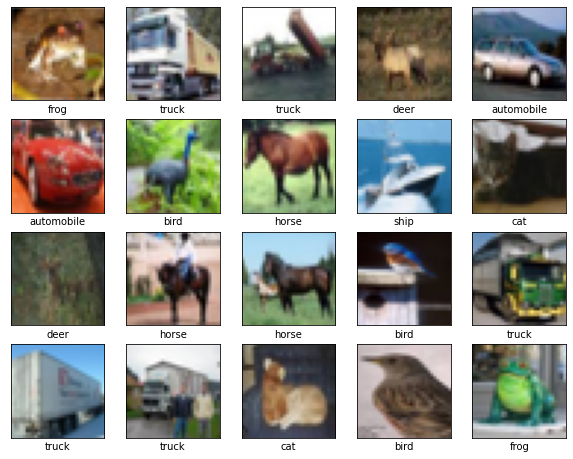

In [6]:
# Define the 10 image classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show the first 10 images
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Die CIFAR Labels sind Arrays, deshalb benötigen wir den extra Index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

---------------------------------------------------------------

In [7]:
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [8]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, dtype ="uint8")
#y_test = to_categorical(y_test, dtype ="uint8")

In [9]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
def get_early_stopping():
  # patience: Number of epochs with no improvement after which training will be stopped.
  return EarlyStopping(monitor = 'val_loss', patience = 3)

**MODEL 2**

In [16]:
model2 = models.Sequential()


In [17]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.6)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.6)(x)
 
# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)
 
model2 = Model(i, x)
 
# model description
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   

In [18]:
# Compile
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Fit
history = model2.fit(x_train, 
               y_train, 
               validation_data=(x_test, y_test), 
               epochs = 50,
               callbacks = [get_early_stopping()])

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5689 - accuracy: 0.4744 - val_loss: 1.2028 - val_accuracy: 0.5989
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0648 - accuracy: 0.6311 - val_loss: 1.0340 - val_accuracy: 0.6507
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9125 - accuracy: 0.6865 - val_loss: 0.8296 - val_accuracy: 0.7157
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8086 - accuracy: 0.7256 - val_loss: 0.7805 - val_accuracy: 0.7384
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7193 - accuracy: 0.7560 - val_loss: 0.7027 - val_accuracy: 0.7664
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6474 - accuracy: 0.7798 - val_loss: 0.6065 - val_accuracy: 0.7913
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5766 - accuracy: 0.8046 - val_loss: 0.5951 - val_ac

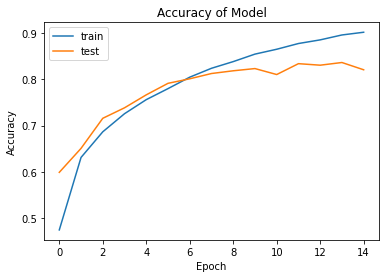

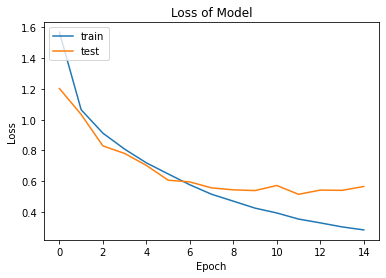

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
#model2.save("MyDrive/NN_Proje/second_cnn_22-50_epoch_06_dropout_lastbest.h5")

In [11]:
loaded_model = keras.models.load_model("MyDrive/NN_Proje/second_cnn_22-50_epoch_06_dropout_lastbest.h5")

In [12]:
results = loaded_model.evaluate(x_test, y_test)

results

313/313 [==============================] - 23s 71ms/step - loss: 0.5540 - accuracy: 0.8409


[0.5540353059768677, 0.8409000039100647]